Processed and saved: cleaned_both hand.csv
Processed and saved: cleaned_right hand.csv
Processed and saved: cleaned_left hand.csv
Processed and saved: cleaned_no thought.csv


,Timestamp,Ch_3,Ch_5,Ch_6,Ch_7
0,3565.442053,12.024076,7.662196,10.277444,7.635716
1,3565.446053,10.137243,5.449596,9.455206,5.532763
2,3565.450053,6.844450,1.973456,6.848546,2.141627
3,3565.454053,3.968494,-0.805967,4.316553,-0.575916
4,3565.458053,0.292261,-3.742646,0.526427,-3.369702
...,...,...,...,...,...
44215,3748.022097,2.368548,0.896397,1.832316,0.906541
44216,3748.026097,1.573731,-0.728058,0.782581,-0.687337
44217,3748.030097,0.511216,-2.181600,-0.479990,-2.139493
44218,3748.034097,-2.620143,-4.237863,-3.856473,-4.351042


,Ch_3,Ch_5,Ch_6,Ch_7,label
0,1.209798,-3.946149,1.841474,-3.978933,0
1,1.429466,-4.078691,2.083793,-4.060263,0
2,1.468656,-3.565141,1.597832,-3.495450,0
3,1.358201,-3.379465,0.750133,-3.277405,0
4,1.390880,-2.657237,0.310897,-2.538791,0
...,...,...,...,...,...
135155,2.368548,0.896397,1.832316,0.906541,2
135156,1.573731,-0.728058,0.782581,-0.687337,2
135157,0.511216,-2.181600,-0.479990,-2.139493,2
135158,-2.620143,-4.237863,-3.856473,-4.351042,2


In [ ]:
impp

In [5]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/right hand.csv")  # Update with your file
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']

# === Define Constants ===
fs = 250               # Sampling frequency (Hz), update if needed
window_size = 250      # Samples per window (1 second windows if fs=128)

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD comparison per window ===
left_psd_list = []
right_psd_list = []
diff_list = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    # Compute PSD for each channel
    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)  # mean PSD power over frequencies

        if ch in ['Ch_3', 'Ch_6']:
            psd_right.append(avg_psd)
        else:
            psd_left.append(avg_psd)

    # Average PSD per region
    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list.append(right_avg - left_avg)

# === Plot Results ===
right_hand_right_psd = np.array(right_psd_list)
right_hand_left_psd = np.array(left_psd_list)

# Plot Left vs Right PSD
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# Plot Difference
plt.figure(figsize=(12, 4))
plt.plot(diff_list, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Right - Left PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\nAverage Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list):.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/right hand.csv'

In [ ]:
len(diff_list)

183

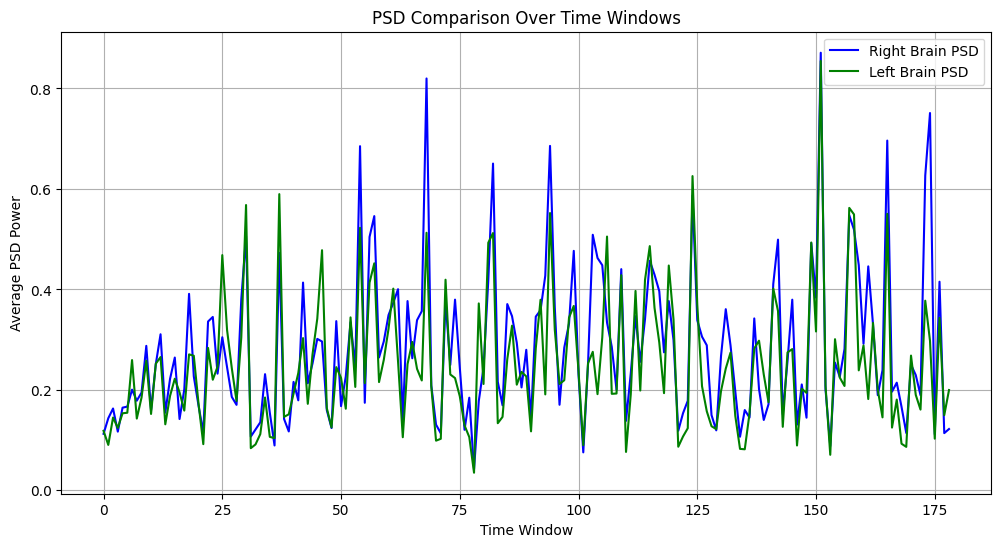

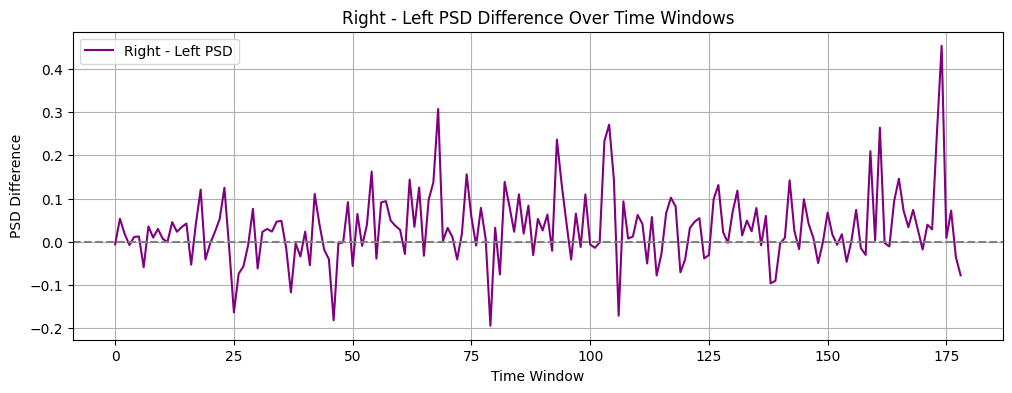


Average Right PSD: 0.2826
Average Left PSD: 0.2503
Average (Right - Left): 0.0323


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/left hand.csv")  # Update with your file
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']

# === Define Constants ===
fs = 250               # Sampling frequency (Hz), update if needed
window_size = 250      # Samples per window (1 second windows if fs=128)

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD comparison per window ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    # Compute PSD for each channel
    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)  # mean PSD power over frequencies

        if ch in ['Ch_3', 'Ch_6']:
            psd_right.append(avg_psd)
        else:
            psd_left.append(avg_psd)

    # Average PSD per region
    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(right_avg - left_avg)
left_hand_right_psd = np.array(right_psd_list)
left_hand_left_psd = np.array(left_psd_list)

# === Plot Results ===

# Plot Left vs Right PSD
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# Plot Difference
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Right - Left PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\nAverage Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


In [ ]:
len(diff_list1)

179

179


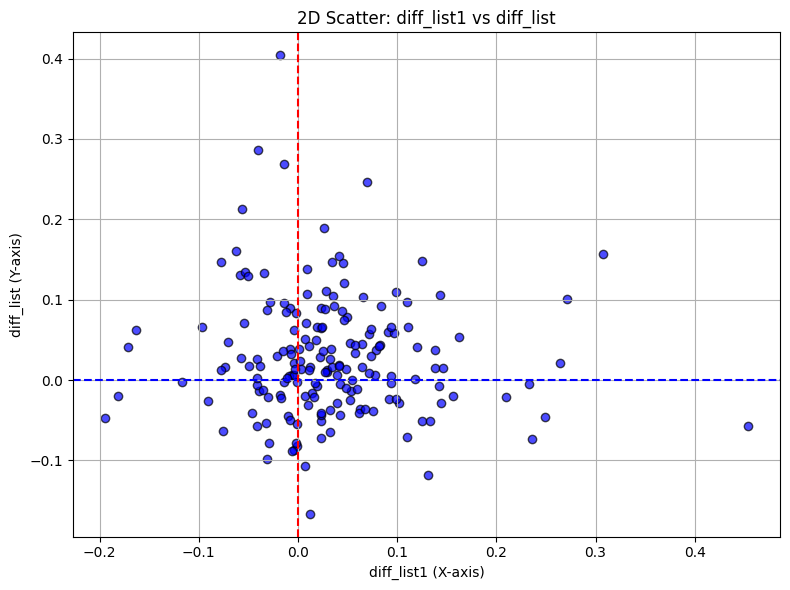

In [ ]:
import matplotlib.pyplot as plt

# Example: diff_list and diff_list1 must be same length
# Make sure you’ve already computed both lists before this
na=diff_list[:179]
print(len(na))
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(diff_list1, na, c='blue', alpha=0.7, edgecolors='k')
plt.title("2D Scatter: diff_list1 vs diff_list")
plt.xlabel("diff_list1 (X-axis)")
plt.ylabel("diff_list (Y-axis)")
plt.grid(True)
plt.axhline(0, linestyle='--', color='blue')
plt.axvline(0, linestyle='--', color='red')
plt.tight_layout()
plt.show()


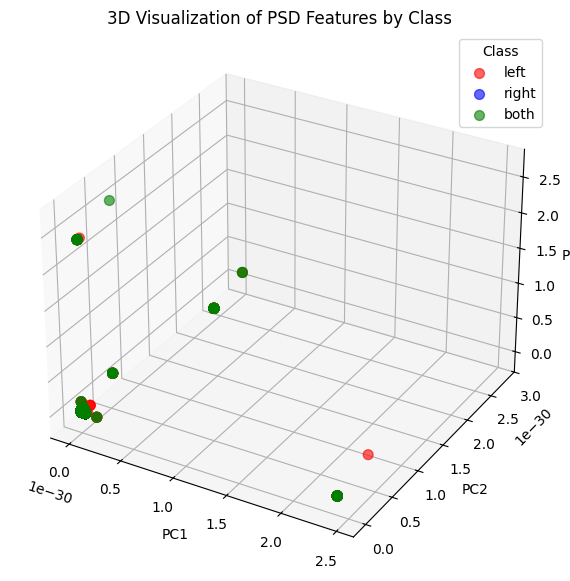

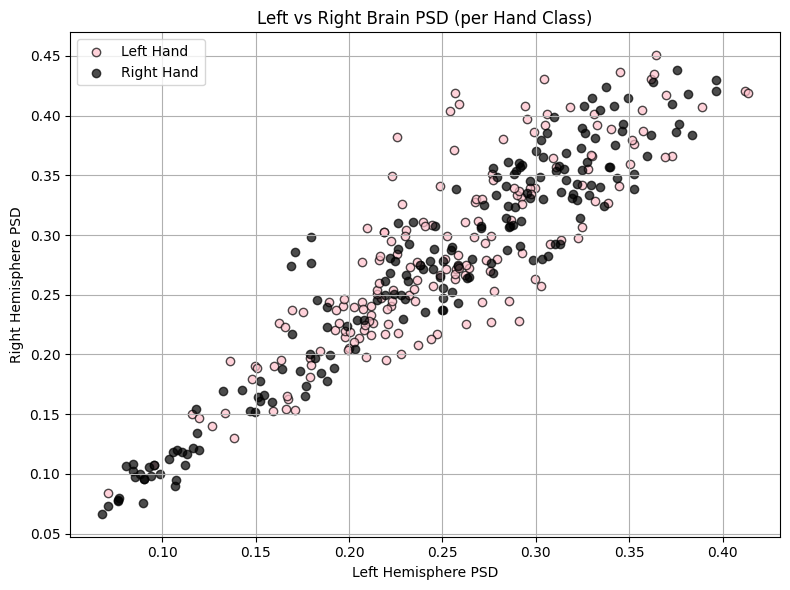

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Apply Gaussian smoothing to each PSD series
left_x_smooth  = moving_average(left_hand_left_psd)
left_y_smooth  = moving_average(left_hand_right_psd)

right_x_smooth = moving_average(right_hand_left_psd)
right_y_smooth = moving_average(right_hand_right_psd)

# Assuming these lists are already computed separately for left/right hand samples:
# left_hand_left_psd, left_hand_right_psd
# right_hand_left_psd, right_hand_right_psd

# Convert to NumPy arrays (already done)
left_x = left_x_smooth   # X-axis: left region
left_y = left_y_smooth  # Y-axis: right region

right_x = right_x_smooth
right_y = right_y_smooth

# Plot
plt.figure(figsize=(8, 6))

# Left hand samples
plt.scatter(left_x, left_y, color='pink', label='Left Hand', edgecolors='k', alpha=0.7)

# Right hand samples
plt.scatter(right_x, right_y, color='black', label='Right Hand', alpha=0.7)

plt.title("Left vs Right Brain PSD (per Hand Class)")
plt.xlabel("Left Hemisphere PSD")
plt.ylabel("Right Hemisphere PSD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


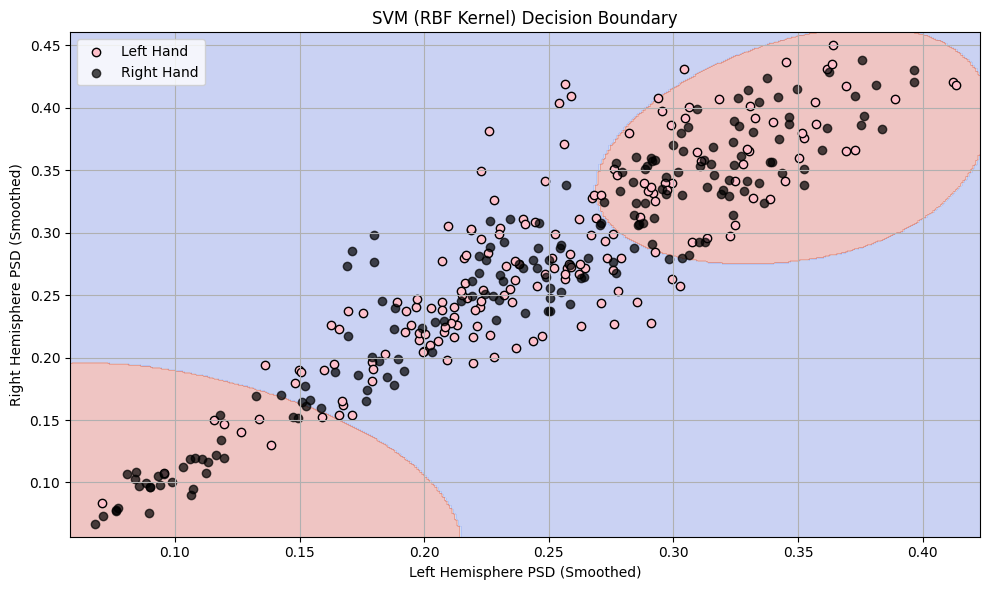

In [46]:
if right_psd>left_psd:
  print("right")
else:
  print("left")

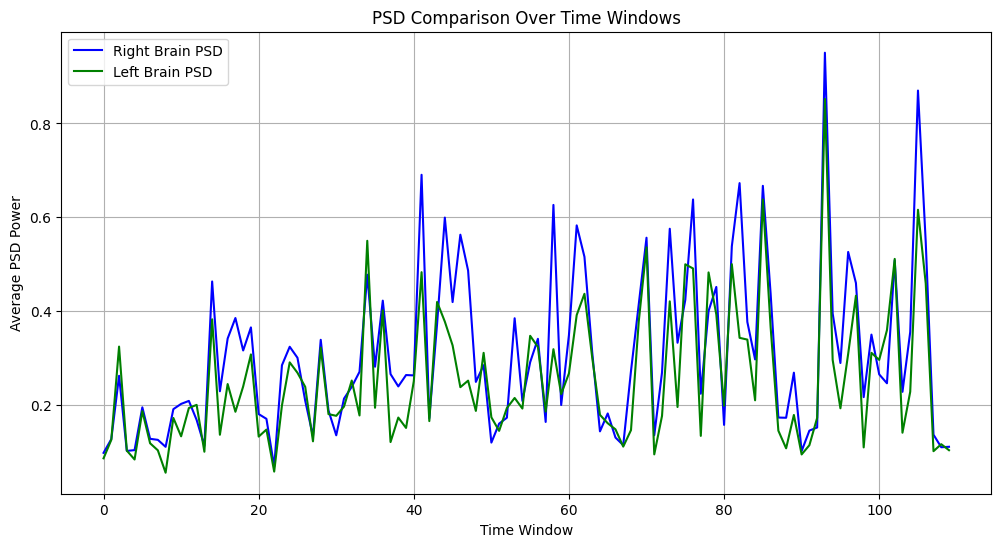

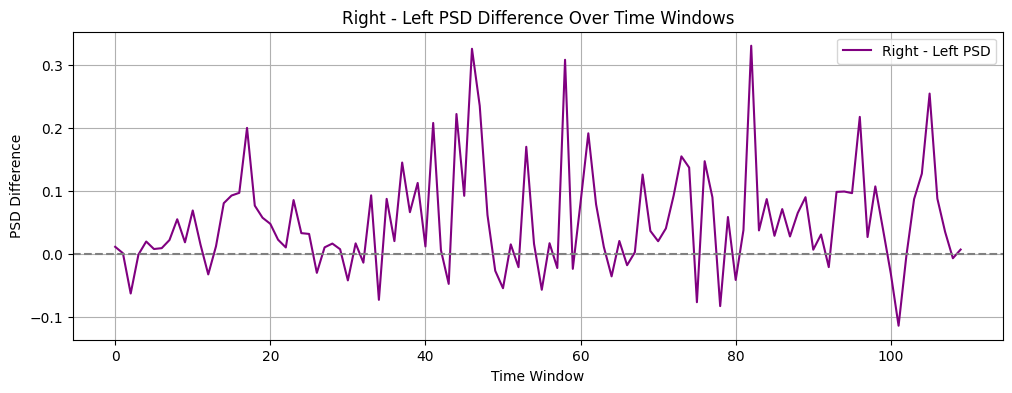


Average Right PSD: 0.3070
Average Left PSD: 0.2542
Average (Right - Left): 0.0528


In [47]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/no thought.csv")  # Update with your file
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']

# === Define Constants ===
fs = 250               # Sampling frequency (Hz), update if needed
window_size = 250      # Samples per window (1 second windows if fs=128)

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD comparison per window ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    # Compute PSD for each channel
    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)  # mean PSD power over frequencies

        if ch in ['Ch_3', 'Ch_6']:
            psd_right.append(avg_psd)
        else:
            psd_left.append(avg_psd)

    # Average PSD per region
    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(right_avg - left_avg)
left_hand_right_psd = np.array(right_psd_list)
left_hand_left_psd = np.array(left_psd_list)

# === Plot Results ===

# Plot Left vs Right PSD
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# Plot Difference
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Right - Left PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\nAverage Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


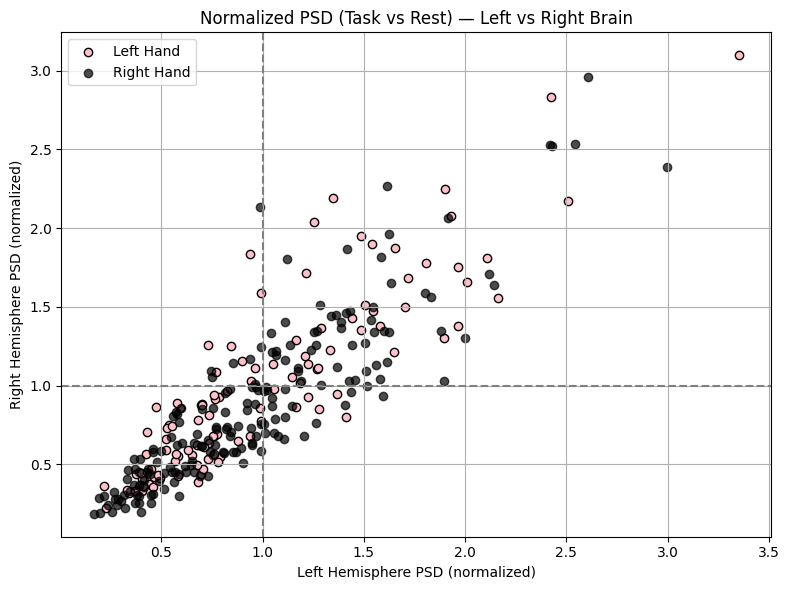

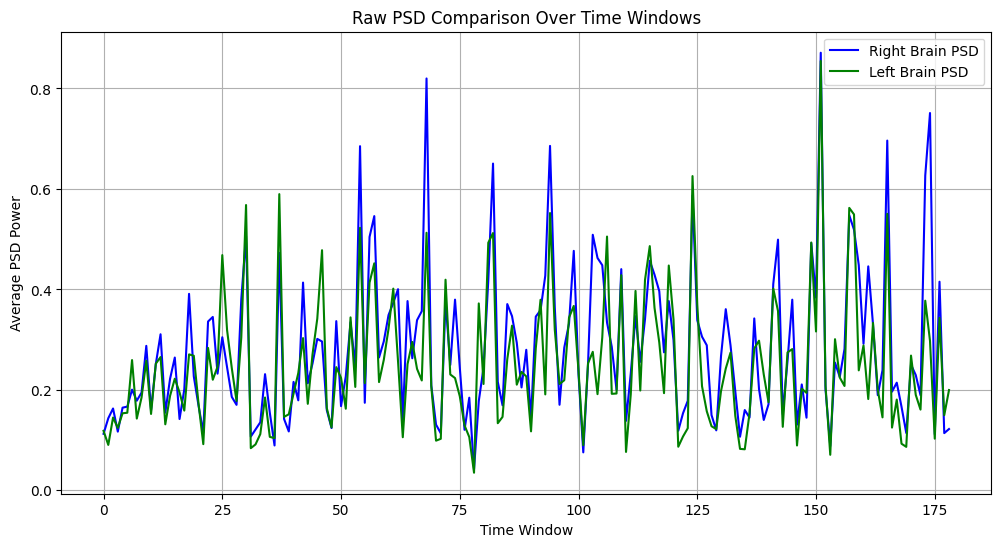

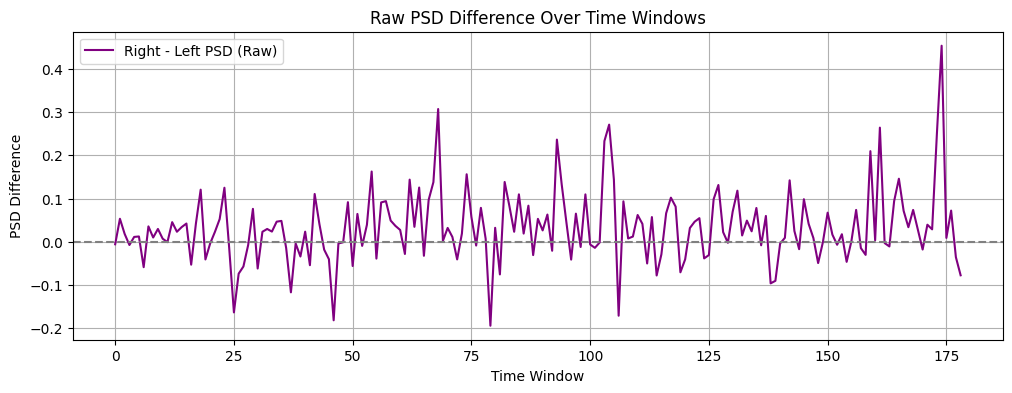

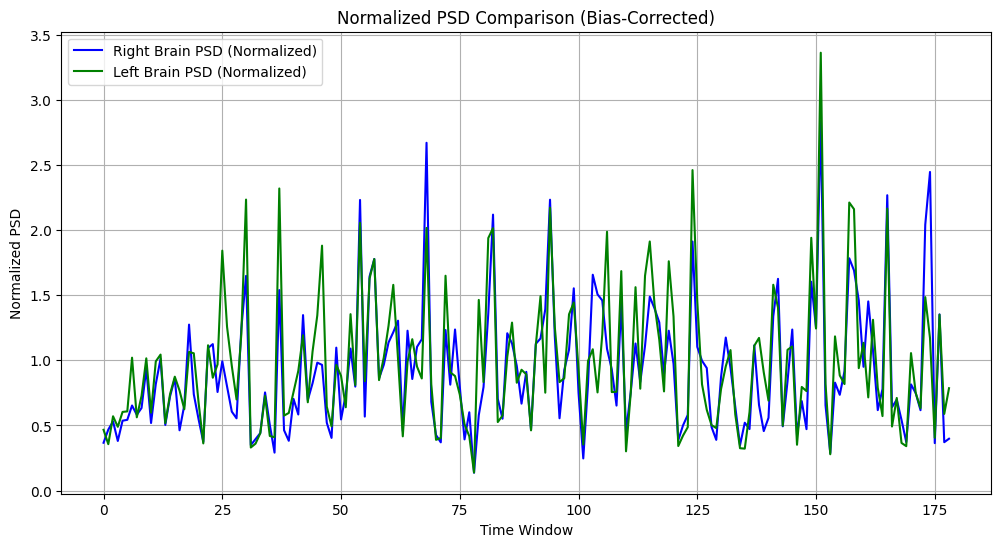

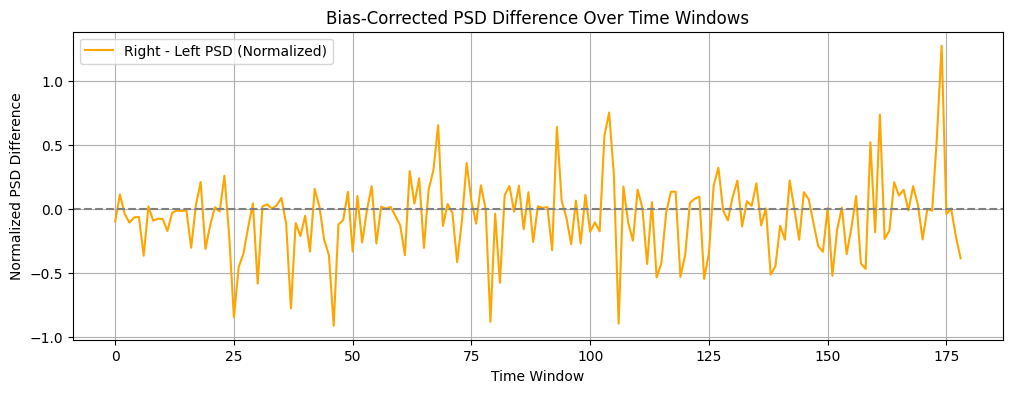


[Raw PSD]
Average Right PSD: 0.2826
Average Left PSD: 0.2503
Average (Right - Left): 0.0323

[Normalized PSD]
Average Right PSD (Normalized): 0.9206
Average Left PSD (Normalized): 0.9848
Average (Right - Left Normalized): -0.0642


In [50]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/left hand.csv")  # Update with your file
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows

# === Resting-state PSD Baselines ===
rest_right_psd_baseline = 0.3070
rest_left_psd_baseline  = 0.2542

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

norm_left_psd_list = []
norm_right_psd_list = []
norm_diff_list = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_3', 'Ch_6']:
            psd_right.append(avg_psd)
        else:
            psd_left.append(avg_psd)

    # Raw averages
    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

    # === Bias-normalized PSDs ===
    norm_left = left_avg / rest_left_psd_baseline
    norm_right = right_avg / rest_right_psd_baseline
    norm_diff = norm_right - norm_left

    norm_left_psd_list.append(norm_left)
    norm_right_psd_list.append(norm_right)
    norm_diff_list.append(norm_diff)

# Convert to numpy
left_hand_right_psd = np.array(right_psd_list)
left_hand_left_psd = np.array(left_psd_list)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Raw Difference ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD (Raw)', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Raw PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Normalized PSD ===
plt.figure(figsize=(12, 6))
plt.plot(norm_right_psd_list, label='Right Brain PSD (Normalized)', color='blue')
plt.plot(norm_left_psd_list, label='Left Brain PSD (Normalized)', color='green')
plt.title('Normalized PSD Comparison (Bias-Corrected)')
plt.xlabel('Time Window')
plt.ylabel('Normalized PSD')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Normalized Difference ===
plt.figure(figsize=(12, 4))
plt.plot(norm_diff_list, label='Right - Left PSD (Normalized)', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Bias-Corrected PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Normalized PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")

print(f"\n[Normalized PSD]")
print(f"Average Right PSD (Normalized): {np.mean(norm_right_psd_list):.4f}")
print(f"Average Left PSD (Normalized): {np.mean(norm_left_psd_list):.4f}")
print(f"Average (Right - Left Normalized): {np.mean(norm_diff_list):.4f}")


In [4]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/right hand.csv")  # Update with your file path
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows (adjust if needed)

# === Resting-state PSD Baselines ===
rest_right_psd_baseline = 0.3070
rest_left_psd_baseline  = 0.2542

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

norm_left_psd_list = []
norm_right_psd_list = []
norm_diff_list = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_5', 'Ch_7']:
            psd_right.append(avg_psd)
        else:
            psd_left.append(avg_psd)

    # Raw averages
    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

    # === Bias-normalized PSDs ===
    norm_left = left_avg / rest_left_psd_baseline
    norm_right = right_avg / rest_right_psd_baseline
    norm_diff = norm_right - norm_left

    norm_left_psd_list.append(norm_left)
    norm_right_psd_list.append(norm_right)
    norm_diff_list.append(norm_diff)

# Convert to numpy
right_hand_right_psd = np.array(right_psd_list)
right_hand_left_psd = np.array(left_psd_list)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows (Right Hand)')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Raw Difference ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD (Raw)', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Raw PSD Difference Over Time Windows (Right Hand)')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Normalized PSD ===
plt.figure(figsize=(12, 6))
plt.plot(norm_right_psd_list, label='Right Brain PSD (Normalized)', color='blue')
plt.plot(norm_left_psd_list, label='Left Brain PSD (Normalized)', color='green')
plt.title('Normalized PSD Comparison (Bias-Corrected) — Right Hand')
plt.xlabel('Time Window')
plt.ylabel('Normalized PSD')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: Normalized Difference ===
plt.figure(figsize=(12, 4))
plt.plot(norm_diff_list, label='Right - Left PSD (Normalized)', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Bias-Corrected PSD Difference Over Time Windows (Right Hand)')
plt.xlabel('Time Window')
plt.ylabel('Normalized PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")

print(f"\n[Normalized PSD]")
print(f"Average Right PSD (Normalized): {np.mean(norm_right_psd_list):.4f}")
print(f"Average Left PSD (Normalized): {np.mean(norm_left_psd_list):.4f}")
print(f"Average (Right - Left Normalized): {np.mean(norm_diff_list):.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/right hand.csv'

In [1]:
import pandas as pd

# Load each CSV
left_df = pd.read_csv("/content/left_1.csv")
right_df = pd.read_csv("/content/left_2.csv")
both_df = pd.read_csv("/content/left_3.csv")

# Concatenate them
all_data = pd.concat([left_df, right_df, both_df], ignore_index=True)

# Save to a new CSV (optional)
all_data.to_csv("/content/combined_data.csv", index=False)

print("✅ Combined CSV saved as 'combined_data.csv'")


✅ Combined CSV saved as 'combined_data.csv'


In [2]:
import pandas as pd

# Load each CSV
left_df = pd.read_csv("/content/right_1.csv")
right_df = pd.read_csv("/content/right_2.csv")
both_df = pd.read_csv("/content/right_3.csv")

# Concatenate them
all_data = pd.concat([left_df, right_df, both_df], ignore_index=True)

# Save to a new CSV (optional)
all_data.to_csv("/content/combined_data1.csv", index=False)

print("✅ Combined CSV saved as 'combined_data1.csv'")


✅ Combined CSV saved as 'combined_data1.csv'


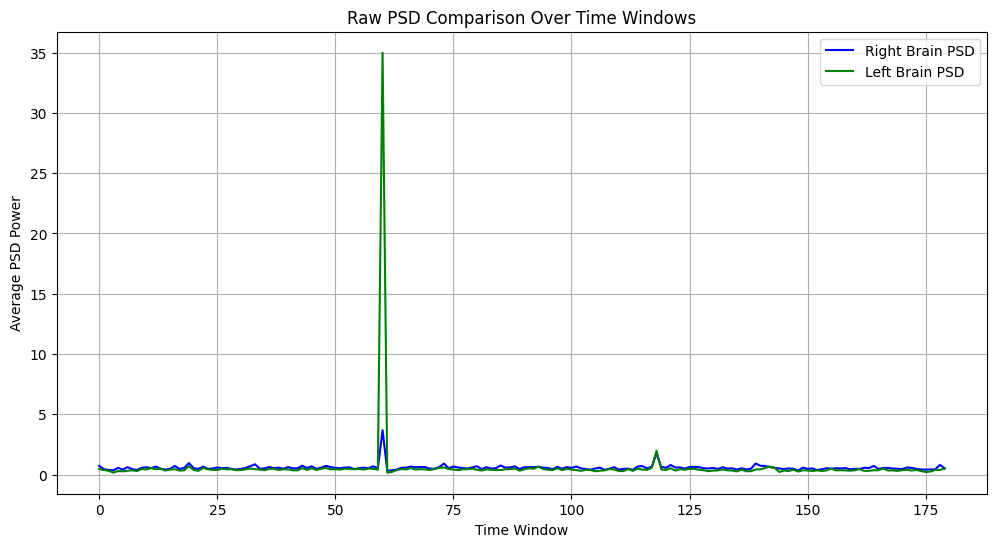

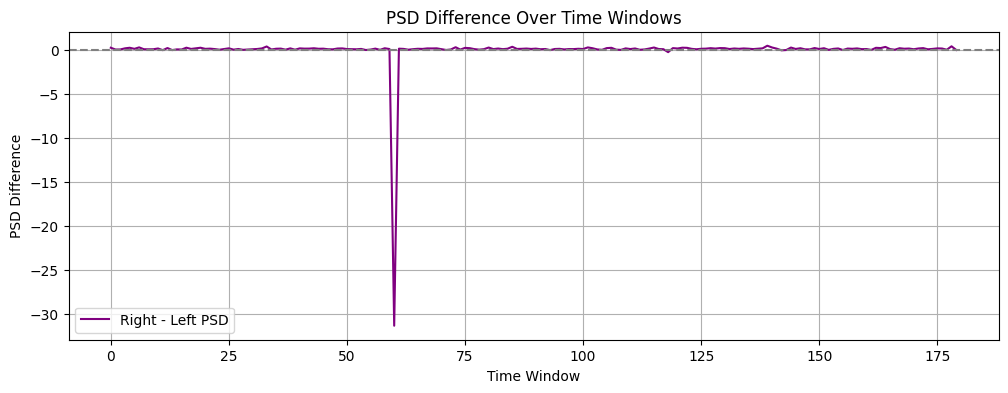


[Raw PSD]
Average Right PSD: 0.5826
Average Left PSD: 0.6121
Average (Right - Left): -0.0295


In [9]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/combined_data.csv")  # Update with your file path
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_5', 'Ch_7']:  # LEFT side channels
            psd_left.append(avg_psd)
        else:                       # RIGHT side channels
            psd_right.append(avg_psd)

    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: PSD Difference (Right - Left) ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


In [11]:
df=pd.read_csv("/content/right_1.csv")
df

,Timestamp,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,Ch_5,Ch_6,Ch_7
0,24631.055089,187500.0,187500.0,187500.0,61297.871094,187500.0,79099.156250,66066.906250,67901.046875
1,24631.059089,187500.0,187500.0,187500.0,61317.449219,187500.0,79121.289062,66086.843750,67923.148438
2,24631.063089,187500.0,187500.0,187500.0,61306.835938,187500.0,79109.687500,66077.187500,67911.953125
3,24631.067089,187500.0,187500.0,187500.0,61300.062500,187500.0,79102.015625,66069.703125,67903.835938
4,24631.071089,187500.0,187500.0,187500.0,61307.394531,187500.0,79110.289062,66076.921875,67911.437500
...,...,...,...,...,...,...,...,...,...
15115,24691.435140,187500.0,187500.0,187500.0,61685.941406,187500.0,79965.265625,66549.703125,68118.414062
15116,24691.439140,187500.0,187500.0,187500.0,61707.757812,187500.0,79979.976562,66567.093750,68134.015625
15117,24691.443140,187500.0,187500.0,187500.0,61713.816406,187500.0,79983.234375,66572.187500,68138.132812
15118,24691.447140,187500.0,187500.0,187500.0,61706.550781,187500.0,79974.046875,66565.195312,68129.343750


In [1]:
import pandas as pd

# === Load CSV files ===
left_df = pd.read_csv("/content/left_l1.csv")
right_df = pd.read_csv("/content/left_l2.csv")
both_df = pd.read_csv("/content/left_l3.csv")

# === Concatenate ===
combined_df = pd.concat([left_df, right_df, both_df], ignore_index=True)

# === Save to new CSV file ===
combined_df.to_csv("/content/LEFT_data.csv", index=False)

print("✅ Combined CSV saved as '/content/LEFT_data.csv'")


✅ Combined CSV saved as '/content/LEFT_data.csv'


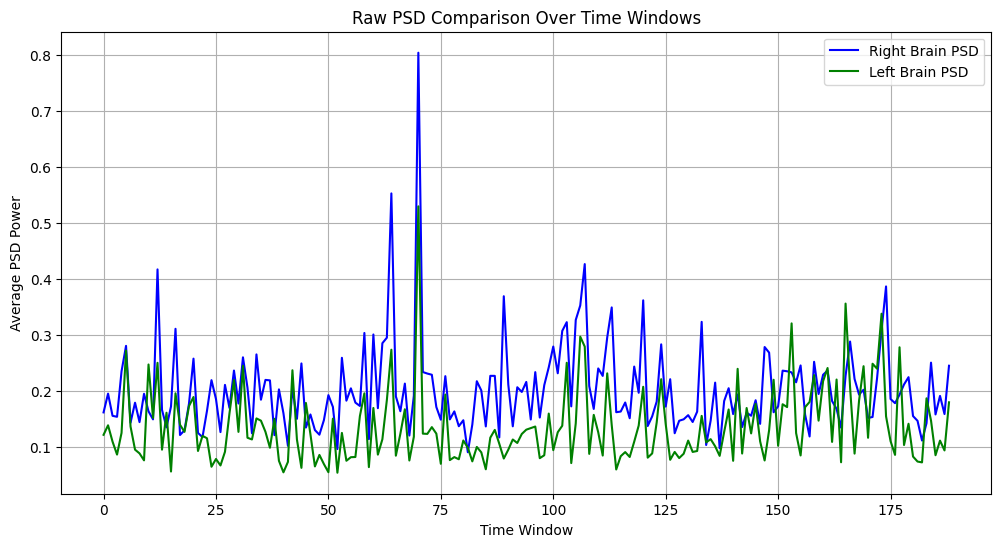

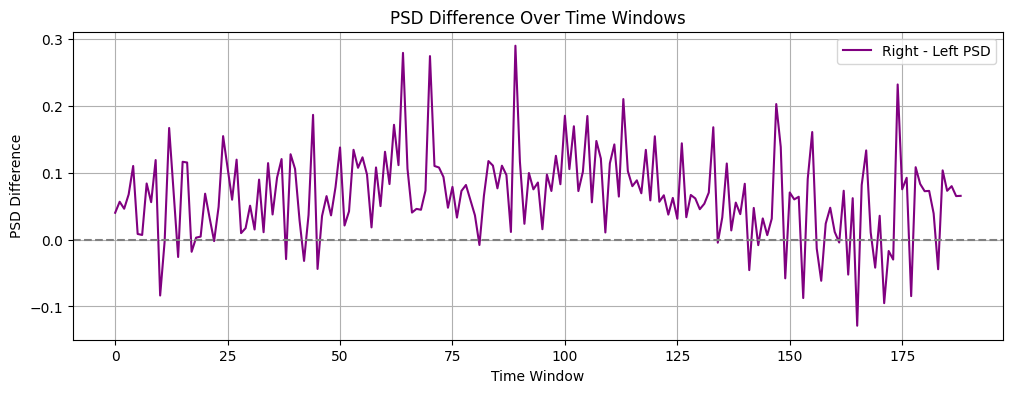


[Raw PSD]
Average Right PSD: 0.2025
Average Left PSD: 0.1357
Average (Right - Left): 0.0668


In [2]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/LEFT_data.csv")  # Update with your file path
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_5', 'Ch_7']:  # LEFT side channels
            psd_left.append(avg_psd)
        else:                       # RIGHT side channels
            psd_right.append(avg_psd)

    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: PSD Difference (Right - Left) ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


In [3]:
import pandas as pd

# === Load CSV files ===
left_df = pd.read_csv("/content/right_r1.csv")
right_df = pd.read_csv("/content/right_r2.csv")
both_df = pd.read_csv("/content/right_r3.csv")

# === Concatenate ===
combined_df = pd.concat([left_df, right_df, both_df], ignore_index=True)

# === Save to new CSV file ===
combined_df.to_csv("/content/RIGHT_data.csv", index=False)

print("✅ Combined CSV saved as '/content/RIGHT_data.csv'")


✅ Combined CSV saved as '/content/RIGHT_data.csv'


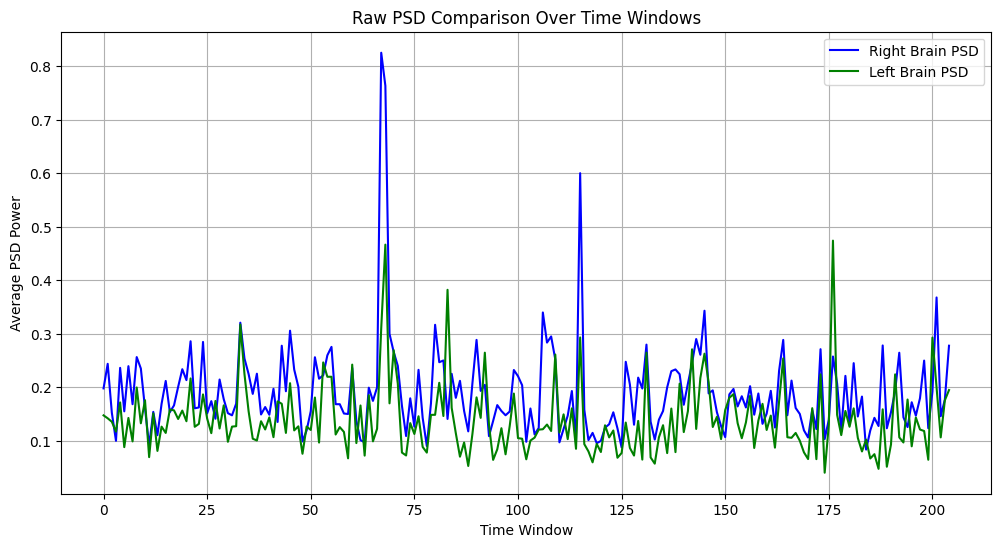

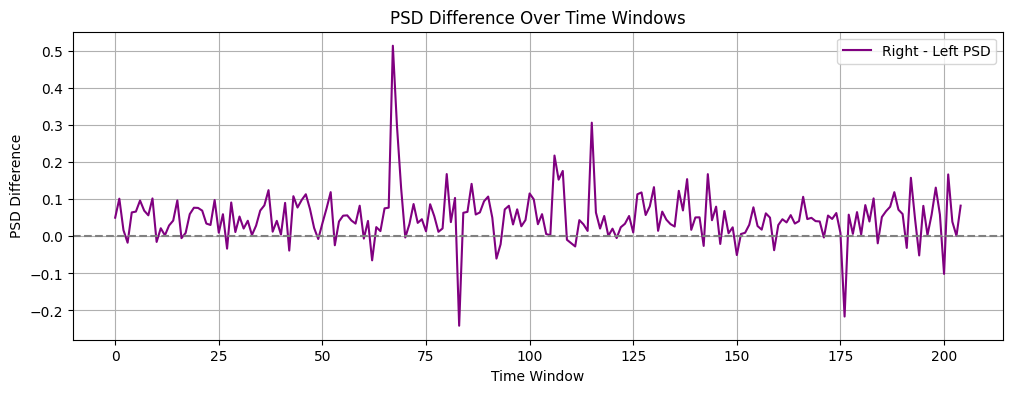


[Raw PSD]
Average Right PSD: 0.1912
Average Left PSD: 0.1400
Average (Right - Left): 0.0512


In [4]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/RIGHT_data.csv")  # Update with your file path
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_5', 'Ch_7']:  # LEFT side channels
            psd_left.append(avg_psd)
        else:                       # RIGHT side channels
            psd_right.append(avg_psd)

    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: PSD Difference (Right - Left) ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


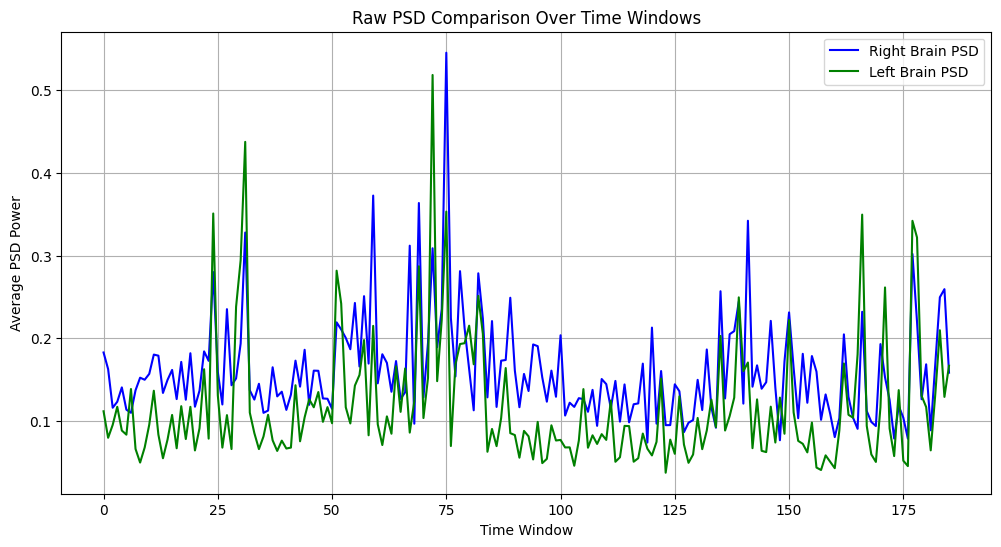

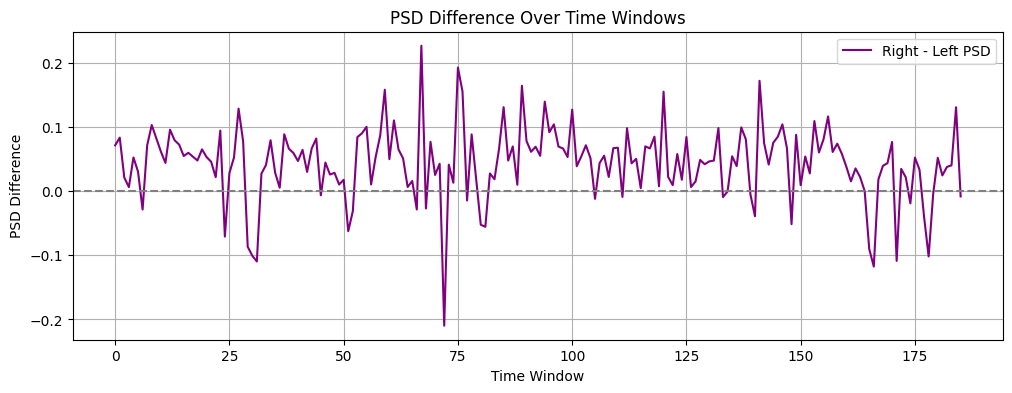


[Raw PSD]
Average Right PSD: 0.1608
Average Left PSD: 0.1176
Average (Right - Left): 0.0432


In [5]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("/content/striaght_face.csv")  # Update with your file path
channels = ['Ch_3', 'Ch_6', 'Ch_5', 'Ch_7']  # Right: Ch_3, Ch_6 | Left: Ch_5, Ch_7

# === Define Constants ===
fs = 250               # Sampling frequency (Hz)
window_size = 250      # 1-second windows

# === Convert data to numpy ===
data = df[channels].values
num_windows = data.shape[0] // window_size

# === Store PSD values ===
left_psd_list = []
right_psd_list = []
diff_list1 = []

# === Compute PSD per window ===
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window_data = data[start:end]

    psd_right = []
    psd_left = []

    for ch_idx, ch in enumerate(channels):
        f, psd = welch(window_data[:, ch_idx], fs=fs, nperseg=64)
        avg_psd = np.mean(psd)

        if ch in ['Ch_5', 'Ch_7']:  # LEFT side channels
            psd_left.append(avg_psd)
        else:                       # RIGHT side channels
            psd_right.append(avg_psd)

    left_avg = np.mean(psd_left)
    right_avg = np.mean(psd_right)
    diff = right_avg - left_avg

    left_psd_list.append(left_avg)
    right_psd_list.append(right_avg)
    diff_list1.append(diff)

# === Plot: Raw PSD ===
plt.figure(figsize=(12, 6))
plt.plot(right_psd_list, label='Right Brain PSD', color='blue')
plt.plot(left_psd_list, label='Left Brain PSD', color='green')
plt.title('Raw PSD Comparison Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('Average PSD Power')
plt.legend()
plt.grid(True)
plt.show()

# === Plot: PSD Difference (Right - Left) ===
plt.figure(figsize=(12, 4))
plt.plot(diff_list1, label='Right - Left PSD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('PSD Difference Over Time Windows')
plt.xlabel('Time Window')
plt.ylabel('PSD Difference')
plt.legend()
plt.grid(True)
plt.show()

# === Summary Stats ===
print(f"\n[Raw PSD]")
print(f"Average Right PSD: {np.mean(right_psd_list):.4f}")
print(f"Average Left PSD: {np.mean(left_psd_list):.4f}")
print(f"Average (Right - Left): {np.mean(diff_list1):.4f}")


In [13]:
import pandas as pd

# === Load CSV files ===
left_df = pd.read_csv("/content/LEFT_data.csv")
right_df = pd.read_csv("/content/RIGHT_data.csv")

# === Define hemisphere channels ===
left_channels = ['Ch_5', 'Ch_7']
right_channels = ['Ch_3', 'Ch_6']

# === Function to compute average PSD for each hemisphere ===
def compute_psd_columns(df):
    df['left_psd'] = df[left_channels].mean(axis=1)
    df['right_psd'] = df[right_channels].mean(axis=1)
    df['sum'] = df['left_psd'] + df['right_psd']
    df['diff'] = df['right_psd'] - df['left_psd']
    return df

# === Add labels and compute PSD stats ===
left_df = compute_psd_columns(left_df)
left_df['label'] = 'left'

right_df = compute_psd_columns(right_df)
right_df['label'] = 'right'


# === Merge all ===
combined_df = pd.concat([left_df, right_df], ignore_index=True)

# === Save to CSV ===
combined_df.to_csv("/content/merged_labeled_psd.csv", index=False)

print("✅ Merged and labeled file saved as '/content/merged_labeled_psd.csv'")


✅ Merged and labeled file saved as '/content/merged_labeled_psd.csv'


In [14]:
df=pd.read_csv("/content/merged_labeled_psd.csv")
df

,Timestamp,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,Ch_5,Ch_6,Ch_7,left_psd,right_psd,sum,diff,label
0,28771.567837,1.146734e-09,1.146734e-09,1.146734e-09,-1.383532,1.146734e-09,9.010309,1.642348,9.214046,9.112177,0.129408,9.241585,-8.982770,left
1,28771.571837,-1.928729e-09,-1.928729e-09,-1.928729e-09,-2.131372,-1.928729e-09,10.324113,2.141927,10.443106,10.383609,0.005278,10.388887,-10.378332,left
2,28771.575838,1.146734e-09,1.146734e-09,1.146734e-09,1.079682,1.146734e-09,7.503218,4.135988,7.461001,7.482110,2.607835,10.089945,-4.874274,left
3,28771.579838,-1.928729e-09,-1.928729e-09,-1.928729e-09,2.532926,-1.928729e-09,6.155792,4.907734,6.056421,6.106107,3.720330,9.826437,-2.385776,left
4,28771.583837,1.146734e-09,1.146734e-09,1.146734e-09,3.339471,1.146734e-09,-1.714826,2.494702,-1.801278,-1.758052,2.917087,1.159035,4.675139,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98585,28734.046059,1.146734e-09,1.146734e-09,1.146734e-09,3.764716,1.146734e-09,-1.468396,-0.148785,-1.448178,-1.458287,1.807966,0.349678,3.266253,right
98586,28734.050059,-1.928729e-09,-1.928729e-09,-1.928729e-09,3.870300,-1.928729e-09,-1.261564,-0.119737,-1.271896,-1.266730,1.875281,0.608551,3.142012,right
98587,28734.054059,1.146734e-09,1.146734e-09,1.146734e-09,1.133887,1.146734e-09,-2.279603,-1.701052,-2.386950,-2.333276,-0.283583,-2.616859,2.049693,right
98588,28734.058059,-1.928729e-09,-1.928729e-09,-1.928729e-09,-0.030329,-1.928729e-09,-2.686991,-2.324858,-2.839379,-2.763185,-1.177594,-3.940779,1.585592,right


In [21]:
import pandas as pd

# Load your merged CSV
df = pd.read_csv("/content/merged_labeled_psd.csv")

# Columns to drop
drop_cols = ['Ch_0', 'Ch_1', 'Ch_2', 'Ch_4',"Timestamp"]

# Drop them if present
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Save cleaned file
df.to_csv("/content/merged_cleaned_psd.csv", index=False)

print("✅ Cleaned file saved as '/content/merged_cleaned_psd.csv'")


✅ Cleaned file saved as '/content/merged_cleaned_psd.csv'


In [22]:
df=pd.read_csv("/content/merged_cleaned_psd.csv")
df

,Ch_3,Ch_5,Ch_6,Ch_7,left_psd,right_psd,sum,diff,label
0,-1.383532,9.010309,1.642348,9.214046,9.112177,0.129408,9.241585,-8.982770,left
1,-2.131372,10.324113,2.141927,10.443106,10.383609,0.005278,10.388887,-10.378332,left
2,1.079682,7.503218,4.135988,7.461001,7.482110,2.607835,10.089945,-4.874274,left
3,2.532926,6.155792,4.907734,6.056421,6.106107,3.720330,9.826437,-2.385776,left
4,3.339471,-1.714826,2.494702,-1.801278,-1.758052,2.917087,1.159035,4.675139,left
...,...,...,...,...,...,...,...,...,...
98585,3.764716,-1.468396,-0.148785,-1.448178,-1.458287,1.807966,0.349678,3.266253,right
98586,3.870300,-1.261564,-0.119737,-1.271896,-1.266730,1.875281,0.608551,3.142012,right
98587,1.133887,-2.279603,-1.701052,-2.386950,-2.333276,-0.283583,-2.616859,2.049693,right
98588,-0.030329,-2.686991,-2.324858,-2.839379,-2.763185,-1.177594,-3.940779,1.585592,right


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Load your data ===
df = pd.read_csv("/content/merged_cleaned_psd.csv")  # Replace with your file name

# === Select columns to normalize ===
features_to_normalize = ['Ch_3', 'Ch_5', 'Ch_6', 'Ch_7', 'left_psd', 'right_psd', 'sum', 'diff']

# === Apply StandardScaler ===
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# === Save the normalized file ===
df_scaled.to_csv("/content/normalized_eeg.csv", index=False)

print("✅ Normalized data saved as '/content/normalized_eeg.csv'")


✅ Normalized data saved as '/content/normalized_eeg.csv'


In [24]:
df=pd.read_csv("/content/normalized_eeg.csv")
df

,Ch_3,Ch_5,Ch_6,Ch_7,left_psd,right_psd,sum,diff,label
0,-0.259204,2.162414,0.352185,2.169634,2.166686,0.026229,1.145703,-2.080765,left
1,-0.399216,2.477689,0.459315,2.459016,2.468979,0.000979,1.287932,-2.403987,left
2,0.201964,1.800755,0.886919,1.756881,1.779125,0.530395,1.250872,-1.129211,left
3,0.474044,1.477412,1.052412,1.426173,1.451969,0.756700,1.218206,-0.552859,left
4,0.625047,-0.411311,0.534964,-0.423920,-0.417796,0.593303,0.143727,1.082496,left
...,...,...,...,...,...,...,...,...,...
98585,0.704662,-0.352175,-0.031903,-0.340782,-0.346525,0.367684,0.043392,0.756188,right
98586,0.724430,-0.302541,-0.025674,-0.299277,-0.300981,0.381378,0.075484,0.727413,right
98587,0.212112,-0.546841,-0.364770,-0.561816,-0.554560,-0.057782,-0.324363,0.474425,right
98588,-0.005854,-0.644603,-0.498538,-0.668340,-0.656775,-0.239642,-0.488486,0.366936,right


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load data
df = pd.read_csv("/content/normalized_eeg.csv")

# Prepare features and labels
X = df.drop(columns=['label'])
y = df['label'].map({'left': 0, 'right': 1})  # Convert to binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['left', 'right']))


              precision    recall  f1-score   support

        left       0.51      0.48      0.49      9450
       right       0.54      0.57      0.56     10268

    accuracy                           0.53     19718
   macro avg       0.53      0.53      0.53     19718
weighted avg       0.53      0.53      0.53     19718



              precision    recall  f1-score   support

        left       0.48      0.48      0.48      9450
       right       0.52      0.53      0.53     10268

    accuracy                           0.51     19718
   macro avg       0.50      0.50      0.50     19718
weighted avg       0.50      0.51      0.51     19718



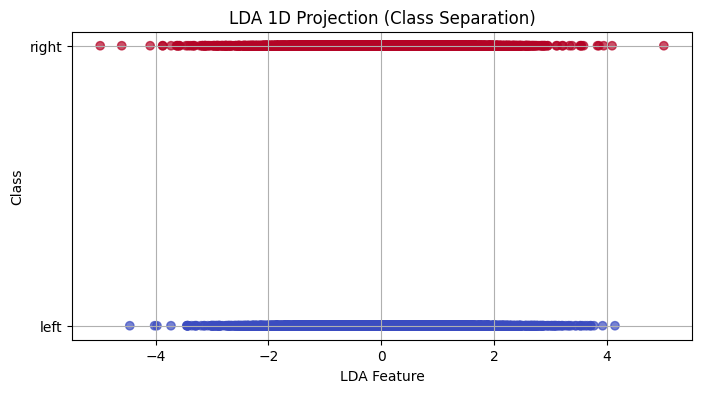

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load normalized data
df = pd.read_csv("/content/normalized_eeg.csv")

# Prepare features and labels
X = df.drop(columns=['label'])
y = df['label'].map({'left': 0, 'right': 1})  # binary

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply LDA (reduce to 1D or 2D)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train classifier on LDA-transformed features
clf = RandomForestClassifier()
clf.fit(X_train_lda, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test, y_pred, target_names=['left', 'right']))

# Optional: Plot 1D projection
plt.figure(figsize=(8, 4))
plt.scatter(X_test_lda, y_test, c=y_test, cmap='coolwarm', alpha=0.7)
plt.title("LDA 1D Projection (Class Separation)")
plt.xlabel("LDA Feature")
plt.ylabel("Class")
plt.yticks([0, 1], ['left', 'right'])
plt.grid(True)
plt.show()


In [27]:
import pandas as pd
import numpy as np
from scipy.signal import spectrogram
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === Config ===
FS = 250               # Sampling frequency
WINDOW_SIZE = 250      # 1-second windows
N_PER_SEG = 64         # For spectrogram
CHANNELS = ['Ch_3', 'Ch_5', 'Ch_6', 'Ch_7']  # EEG channels to use
LABEL_COL = 'label'    # Column containing labels

# === Load EEG CSV ===
df = pd.read_csv("/content/normalized_eeg.csv")  # Your uploaded file

# === Label encode ('left', 'right') → (0, 1) ===
df[LABEL_COL] = LabelEncoder().fit_transform(df[LABEL_COL])

# === Segment into windows and compute spectrograms ===
X_images = []
y_labels = []

num_windows = df.shape[0] // WINDOW_SIZE

for i in range(num_windows):
    window = df.iloc[i * WINDOW_SIZE : (i + 1) * WINDOW_SIZE]
    if len(window) < WINDOW_SIZE:
        continue

    spec_imgs = []
    for ch in CHANNELS:
        f, t, Sxx = spectrogram(window[ch].values, fs=FS, nperseg=N_PER_SEG)
        spec_imgs.append(Sxx)

    # Stack all channels → shape: (4, F, T)
    spec_stack = np.stack(spec_imgs, axis=0)
    X_images.append(spec_stack)
    y_labels.append(window[LABEL_COL].iloc[0])  # assume label consistent

# Convert to NumPy arrays
X_images = np.array(X_images)       # shape: (num_samples, 4, F, T)
y_labels = np.array(y_labels)

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_images, y_labels, test_size=0.2, stratify=y_labels, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (315, 4, 33, 4), Test shape: (79, 4, 33, 4)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# === Convert to PyTorch tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# === DataLoader ===
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# === Define CNN Model ===
class EEGSpectrogramCNN(nn.Module):
    def __init__(self):
        super(EEGSpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 2)  # binary classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # shape: [B, 16, 16, 2]
        x = self.pool(torch.relu(self.conv2(x)))  # shape: [B, 32, 8, 2]
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEGSpectrogramCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/15, Loss: 0.6971
Epoch 2/15, Loss: 0.6925
Epoch 3/15, Loss: 0.6926
Epoch 4/15, Loss: 0.6930
Epoch 5/15, Loss: 0.6923
Epoch 6/15, Loss: 0.6929
Epoch 7/15, Loss: 0.6926
Epoch 8/15, Loss: 0.6922
Epoch 9/15, Loss: 0.6919
Epoch 10/15, Loss: 0.6918
Epoch 11/15, Loss: 0.6927
Epoch 12/15, Loss: 0.6917
Epoch 13/15, Loss: 0.6909
Epoch 14/15, Loss: 0.6912
Epoch 15/15, Loss: 0.6886


In [32]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_targets.extend(y_batch.numpy())

print("\nClassification Report:")
print(classification_report(all_targets, all_preds, target_names=["Left", "Right"]))



Classification Report:
              precision    recall  f1-score   support

        Left       0.00      0.00      0.00        38
       Right       0.52      1.00      0.68        41

    accuracy                           0.52        79
   macro avg       0.26      0.50      0.34        79
weighted avg       0.27      0.52      0.35        79



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
import pandas as pd
import numpy as np
from scipy.signal import welch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# === Load EEG CSV ===
df = pd.read_csv("/content/normalized_eeg.csv")  # your file with columns like Ch_3, Ch_5, ..., label

# === Setup ===
fs = 250
window_size = 750  # 1 second
channels = ['Ch_3', 'Ch_5', 'Ch_6', 'Ch_7']
bands = {'mu': (8, 12), 'beta': (13, 30)}
# === Encode labels (left=0, right=1) ===
df['label'] = LabelEncoder().fit_transform(df['label'])

# === Feature extraction per window ===
X_features = []
y_labels = []

num_windows = df.shape[0] // window_size

for i in range(num_windows):
    window = df.iloc[i * window_size:(i + 1) * window_size]
    if len(window) < window_size:
        continue

    band_feats = []
    for ch in channels:
        f, psd = welch(window[ch].values, fs=fs, nperseg=128)
        for band_range in bands.values():
            band_power = np.mean(psd[(f >= band_range[0]) & (f <= band_range[1])])
            band_feats.append(band_power)

    X_features.append(band_feats)
    y_labels.append(window['label'].iloc[0])

# === Build arrays ===
X = np.array(X_features)
y = np.array(y_labels)

# === Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# === Train Random Forest ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Predict and report ===
y_pred = clf.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Left', 'Right']))



✅ Classification Report:
              precision    recall  f1-score   support

        Left       0.82      0.69      0.75        13
       Right       0.75      0.86      0.80        14

    accuracy                           0.78        27
   macro avg       0.78      0.77      0.78        27
weighted avg       0.78      0.78      0.78        27

